In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
from functools import reduce


In [2]:
folder = './neubot/2012/01/30/'
speedIndex = ['real_address', 'privacy_informed', 'privacy_can_publish', 
              'uuid', 'latency', 'neubot_version', 'timestamp',
              'connect_time', 'remote_address', 'platform',
              'upload_speed', 'download_speed', 'internal_address', 'privacy_can_collect']

bittorrentIndex = ['real_address', 'privacy_can_collect', 'privacy_can_publish', 
                   'download_speed', 'neubot_version', 'timestamp', 
                   'connect_time', 'remote_address', 'platform', 
                   'upload_speed', 'internal_address', 'privacy_informed', 'uuid']

In [3]:

def jsonread(file):
    return json.loads(open(file).read())

def funread(xr):
    return jsonread(xr)

def funappend(dt, xr):
    dt.append(xr.values())
    return dt
    

In [4]:
def phrase(folder):
    speedtestfile = [folder + x for x in os.listdir(folder) if x.endswith('speedtest')]
    bittestfile = [folder + x for x in os.listdir(folder) if x.endswith('bittorrent')]
    
    speedtestdata = reduce(funappend, map(funread, speedtestfile),[])
    bittestdata = reduce(funappend, map(funread, bittestfile),[])
    
    return speedtestdata, bittestdata

In [5]:
sdir , bdir = phrase(folder)

In [6]:

pdspeed = pd.DataFrame(data=sdir, columns=speedIndex)
pdbit = pd.DataFrame(data=bdir, columns=bittorrentIndex)    
    

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['font.size'] = 18
plt.rcParams['axes.unicode_minus'] = False

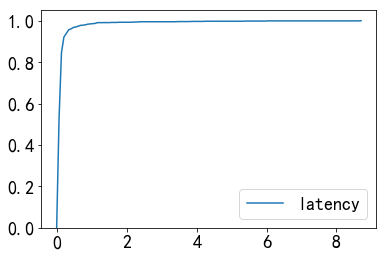

In [24]:
sns.kdeplot(pdspeed['latency'],cumulative=True)


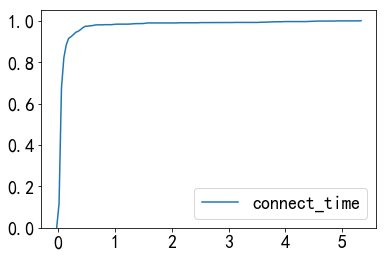

In [25]:
sns.kdeplot(pdspeed['connect_time'],cumulative=True)

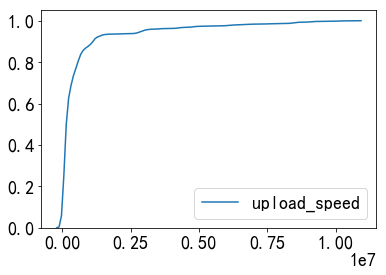

In [26]:
sns.kdeplot(pdspeed['upload_speed'],cumulative=True)

F:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


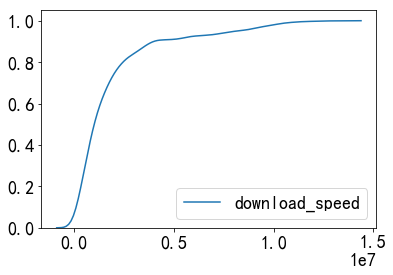

In [27]:
sns.kdeplot(pdspeed['download_speed'],cumulative=True)

In [30]:
pdspeed.head(20)

,real_address,privacy_informed,privacy_can_publish,uuid,latency,neubot_version,timestamp,connect_time,remote_address,platform,upload_speed,download_speed,internal_address,privacy_can_collect
0,78.54.128.178,1,1,8668f3dc-94a5-4686-8ead-b8bf161b9949,0.055193380876,0.004006999,1327940592,0.0524580478668,80.239.142.225,darwin,100851.318566,1075544.87663,192.168.1.127,1
1,93.223.121.32,1,1,540af2e6-2c0b-4173-a8ac-fd971d1b6fcb,0.0195446120078,0.004006999,1327940632,0.0194804088096,80.239.142.225,win32,1140963.09194,5520928.71466,192.168.178.61,1
2,84.151.240.239,1,1,9eff3e01-317a-4ea6-9b53-70ceaef409e3,0.0323203227584,0.004006999,1327940675,0.0317472888491,80.239.142.225,win32,566949.100035,2512056.57547,192.168.2.105,1
3,46.4.205.135,1,1,a6c1fc08-ee0d-480b-915b-a645562435ef,0.0163563598286,0.004006999,1327940889,0.0155808925629,80.239.142.225,linux2,9255097.23338,11328649.4652,46.4.205.135,1
4,84.151.240.239,1,1,60913a00-d944-44a9-a608-676f4ab69251,0.0337823496597,0.004006999,1296404850,0.0436981926893,80.239.142.225,win32,520094.694925,2582079.57421,192.168.2.108,1
5,91.21.174.245,1,1,55d4448d-0fb0-4c16-9eea-1011d54fa1c5,0.0822481892326,0.004006999,1327940909,0.077889919281,80.239.142.225,linux2,16687.6437355,119817.852074,192.168.178.20,1
6,141.20.199.77,1,1,37c3071a-d3f4-42e5-8392-d7afffaf5e6c,0.00990183022838,0.004006999,1327941038,0.00895749503434,80.239.142.225,win32,3136255.96471,1719690.2205,141.20.199.77,1
7,87.151.154.89,1,1,1e108504-630c-479b-a43c-c6eada1f0180,0.02772342075,0.004006999,1327941049,0.0284101963043,80.239.142.225,darwin,973369.219125,2234902.50789,10.1.1.20,1
8,91.65.133.251,1,1,6b7b73d2-41df-4e04-a873-c90a2e3d55a4,0.0151062304898,0.004006999,1327941149,0.0162605163505,80.239.142.225,win32,244539.090092,3728579.20764,192.168.1.103,1
9,109.43.0.46,1,1,9f89ee34-a114-46cb-a58c-d520d561108c,0.124414010481,0.004005999,1327941212,0.0684978961945,80.239.142.225,linux2,48948.862573,147672.07513,192.168.43.95,1


In [ ]:
len(pdspeed)

In [ ]:
itx = next(sdir)
print(itx)

print("dldldldlldldld")

print(itx.values())

print(itx.keys())



In [ ]:
pit = pd.Series(itx)

In [ ]:
pit.index

In [ ]:
next(bdir)

In [ ]:
pib = next(bdir) 
pib.keys()

In [ ]:
pdib = pd.Series(pib)

In [ ]:
pdib.index

In [ ]:
pdib.values

In [ ]:
etpd = pd.DataFrame(data=[], columns=pit.index)

In [ ]:
pd.concat(etpd, pit)